In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import faculty.datasets as datasets
from pandas.api.types import CategoricalDtype
import matplotlib.ticker as mtick


from pandas import Series, DataFrame
import os
from functools import reduce


In [31]:
all_summary18 = pd.read_csv('/project/all_summary18.csv', index_col = 0)
temp_diff = pd.read_csv('/project/temdifference.csv', index_col = 0)
all_summary18.head()
temp_diff.head()

,country_name,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,aerialWonPG,shotsPG,shotOnTargetPG,...,shotsConcededPG,tacklePG,interceptionPG,foulsPG,offsideGivenPG,clearanceTotal,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
0,Argentina,6,13.8,11,0,61.1,85.0,18.3,13.8,4.5,...,10.0,16.5,7.8,14.0,1.5,18.5,35.8,18.3,17.5,6.57
1,Australia,2,11.0,7,0,50.9,83.7,20.3,11.0,2.3,...,8.7,15.0,8.0,12.7,1.0,23.7,36.3,20.3,16.0,6.47
2,Belgium,16,15.1,11,0,52.1,86.3,13.7,15.1,5.7,...,15.1,13.4,7.4,14.1,1.1,16.9,25.9,13.7,12.1,7.06
3,Brazil,8,20.8,7,0,56.8,87.9,14.6,20.8,8.0,...,8.4,17.6,12.0,9.8,1.8,16.2,30.2,14.6,15.6,7.06
4,Colombia,6,9.8,9,1,50.2,79.9,21.8,9.8,3.3,...,11.5,15.8,9.0,15.8,1.8,24.0,44.3,19.3,25.0,6.76


,Country,AvgTemperature,TemperatureDifference
0,Argentina,9.730419,-8.818761
1,Australia,11.830601,-6.718579
2,Belgium,19.479053,0.929872
3,Brazil,19.686096,1.136916
4,Colombia,13.899818,-4.649362


In [32]:
#we first needs to extract the country names column
demo_map = all_summary18[["country_name","goal"]]
demo_map = demo_map.rename(columns={"country_name":"CountryName"})
demo_map['CountryName'] = demo_map['CountryName'].replace({' England':'United Kingdom'})
demo_map["CountryName"] = [x.strip() for x in demo_map['CountryName']]
demo_map


,CountryName,goal
0,Argentina,6
1,Australia,2
2,Belgium,16
3,Brazil,8
4,Colombia,6
5,Costa Rica,2
6,Croatia,14
7,Denmark,3
8,Egypt,2
9,England,12


Below packages were needed to plot the map:<br>
!pip install pysal<br>
!pip install geopandas

In [33]:
#!pip install pysal
!pip install geopandas
import geopandas as gpd


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [34]:
# We used the inbuilt GeoPandas datasets to make the world map which contours the countries  
# code source: https://towardsdatascience.com/interactive-geographical-maps-with-geopandas-4586a9d7cc10

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

# dropping rows where continent=Antartica in order to make our map look a bit bigger
world = world.drop([159])
world
world[world["continent"]== "Antarctica"]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


,pop_est,continent,name,iso_a3,gdp_md_est,geometry


In [35]:
trial = pd.merge(world, temp_diff, 
  left_on='name', 
  right_on='Country',
    how="left")

trial.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,AvgTemperature,TemperatureDifference
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN


In [36]:
#We need to update England Country name to be consistent across all dataframes
trial[trial["name"]=="United Kingdom"]
demo_map[demo_map["CountryName"]=="United Kingdom"]
temp_diff[temp_diff["Country"]=="United Kingdom"]
temp_diff[temp_diff["Country"]=="England"]

temp_diff['Country'] = temp_diff['Country'].replace({'England':'United Kingdom'})
temp_diff[temp_diff["Country"]=="United Kingdom"]



,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,AvgTemperature,TemperatureDifference
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",NaN,NaN,NaN


,CountryName,goal


,Country,AvgTemperature,TemperatureDifference


,Country,AvgTemperature,TemperatureDifference
27,England,18.157559,-0.391621


,Country,AvgTemperature,TemperatureDifference
27,United Kingdom,18.157559,-0.391621


In [37]:
trial = pd.merge(world, temp_diff, 
  left_on='name', 
  right_on='Country',
    how="left")

trial.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,AvgTemperature,TemperatureDifference
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

No handles with labels found to put in legend.


Text(0.45, 0.68, 'Temperature difference per country\ncompared to Russia')

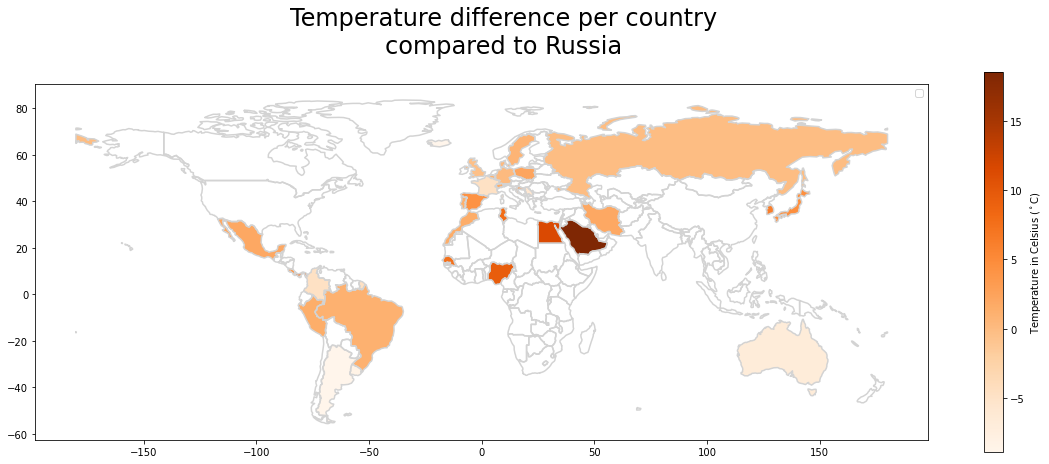

In [38]:
# read in example geodataframe using geopandas datasets
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize = (20,20))
world.boundary.plot(edgecolor=u'white', color='lightgray', ax=ax)

list_countries = list(demo_map['CountryName'])

#This assigns one colour to all countries
trial.loc[trial['name'].isin(list_countries)].plot(edgecolor=u'white', color="lightblue", ax=ax)

trial.plot(column = 'TemperatureDifference',
           cmap = 'Oranges',
           ax = ax,
           legend = True, 
          legend_kwds = {'label': "Temperature in Celsius ($^\circ$C)",
                   'orientation': 'vertical',
                   'shrink': 0.35})

    
#ax.legend(loc=2,fontsize=10)
ax.legend()
fig.suptitle('Temperature difference per country'+"\n"+'compared to Russia', y=0.68, x=0.45 , fontsize=24);


plt.savefig('/project/Visualisation_graphs/Map_TempDiff.png')
plt.show()
